LSTM

Vocabulary Size: 1347
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11, 11)            14817     
                                                                 
 lstm_6 (LSTM)               (None, 11, 50)            12400     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1347)              68697     
                                                                 
Total params: 118664 (463.53 KB)
Trainable params: 118664 (463.53 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


quantum and platform paraqitja e trafikut ndërtimi i një aplikacioni web duke përdorur tesseract
Diversity Score: 0.253
Epoch 1/50
112/112 [==============================] - 5s 41ms/step - loss: 1.7481 - accuracy: 0.5220 - val_loss: 1.8289 - val_accuracy: 0.5246
Epoch 2/50
112/112 [==============================] - 2s 19ms/step - loss: 1.6552 - accuracy: 0.5404 - val_loss: 2.0070 - val_accuracy: 0.5000
Epoch 3/50
112/112 [==============================] - 2s 19ms/step - loss: 1.6284 - accuracy: 0.5575 - val_loss: 2.1829 - val_accuracy: 0.4855
Epoch 4/50
112/112 [==============================] - 2s 19ms/step - loss: 1.6164 - accuracy: 0.5441 - val_loss: 2.2874 - val_accuracy: 0.4743
Epoch 5/50
112/112 [==============================] - 2s 19ms/step - loss: 1.5359 - accuracy: 0.5746 - val_loss: 2.4239 - val_accuracy: 0.4620
Epoch 6/50
112/112 [==============================] - 3s 24ms/step - loss: 1.4840 - accuracy: 0.5698 - val_loss: 2.5548 - val_accuracy: 0.4508
Epoch 7/50
112/112 [==

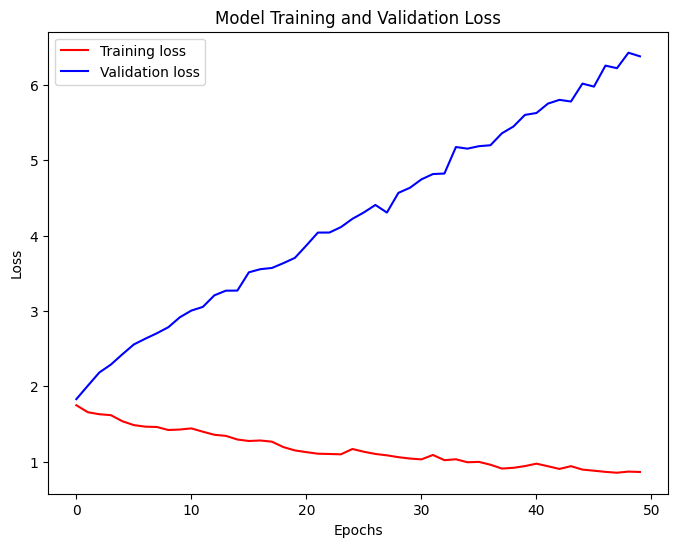

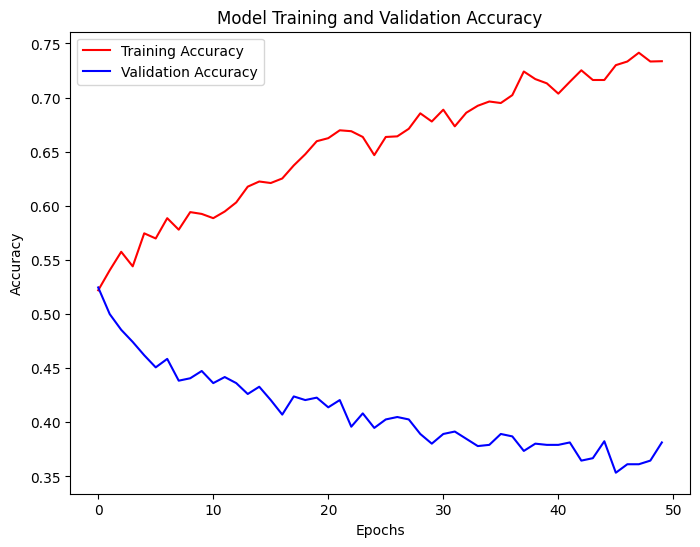

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import os
from matplotlib import pyplot as plt

# Step 1: Load data

df = pd.read_excel('diploma.xlsx')

# Step 2: Text preprocessing
# Combine all text data that the model should learn from
all_text = df['tema'].str.cat(sep=' ') #tema

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([all_text])
encoded = tokenizer.texts_to_sequences([all_text])[0]

# Determine vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size:', vocab_size)

# Create sequences
sequence_length = 11
sequences = []
for i in range(sequence_length, len(encoded)):
    sequence = encoded[i-sequence_length:i+1]
    sequences.append(sequence)

sequences = np.array(sequences)

# Split into X and y
X, y = sequences[:,:-1], sequences[:,-1]
y = np.eye(vocab_size)[y]  # One hot encoding

# Step 3: Model setup
model = Sequential()
model.add(Embedding(vocab_size, 11, input_length=sequence_length))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Summarize the model
model.summary()

# Fit the model
model.fit(X, y, epochs=50, verbose=2, callbacks=[EarlyStopping(monitor='loss', patience=5)])

# Function to generate text
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

model.save('thesis_generator_model.h5')

# Generate a new theme
field1 = 'quantum'
field2 = 'platform'
#seed_text = field1
seed_text = f"{field1} and {field2}"
new_text=generate_text(seed_text, 11, model, sequence_length)
print(new_text)

from collections import Counter

def measure_diversity(texts):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    total_words = len(all_words)
    unique_words = len(word_counts)
    diversity_score = unique_words / total_words
    return diversity_score

diversity_score = measure_diversity(new_text)
print(f"Diversity Score: {diversity_score:.3f}")

# Function to plot the training and validation loss
def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], 'r', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # If accuracy is being tracked, plot that as well
    if 'accuracy' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
        plt.title('Model Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

history = model.fit(X, y, epochs=50, validation_split=0.2)

if 'val_accuracy' in history.history:
    mean_val_accuracy = np.mean(history.history['val_accuracy'])
    print("Mean Validation Accuracy over all epochs:", mean_val_accuracy)

if 'val_loss' in history.history:
    mean_loss_accuracy = np.mean(history.history['val_loss'])
    print("Mean Validation Loss over all epochs:", mean_loss_accuracy)

plot_history(history)


kNN

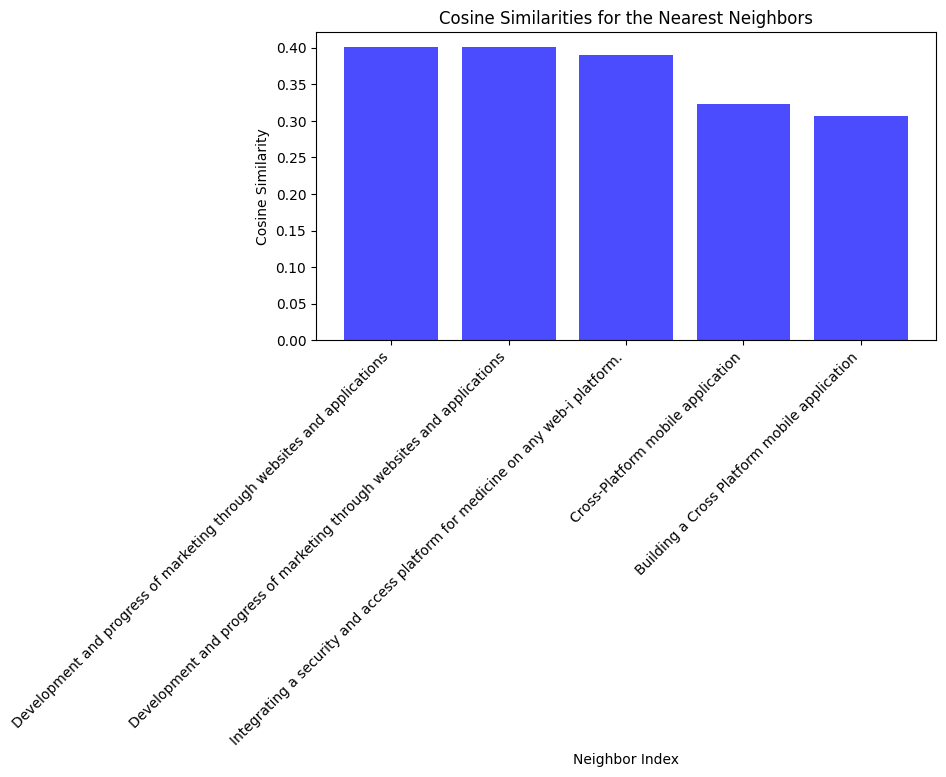

2023 Development and progress of marketing through websites and applications
2022 Integrating a security and access platform for medicine on any web-i platform.
2021 Development and progress of marketing through websites and applications
2020 Cross-Platform mobile application
2020 Building a Cross Platform mobile application


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Sample data loading
df = pd.read_excel('diploma.xlsx')

# Vectorization of the themes
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['theme'])

# Setup k-NN
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)

# Define a function to make recommendations based on user input
def recommend_themes(field1, field2):
    query = f"{field1} and {field2}"
    query_vec = vectorizer.transform([query])
    distances, indices = knn.kneighbors(query_vec)
    similarities = 1 - distances

    entries = []

    # Fetch the themes that are closest to the query
    for index in indices[0]:
        year = df['year'].iloc[index]
        theme = df['theme'].iloc[index]
        entries.append((year, theme))

    # Sort the list by year in descending order
    entries_sorted = sorted(entries, reverse=True, key=lambda x: x[0])

    # Plotting the similarities with correct x-axis labels
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(similarities[0])), similarities[0], color='blue', alpha=0.7)
    plt.title('Cosine Similarities for the Nearest Neighbors')
    plt.xlabel('Neighbor Index')
    plt.ylabel('Cosine Similarity')

    # Get titles for the x-axis ticks
    tick_labels = [df['theme'].iloc[i] for i in indices[0]]

    plt.xticks(range(len(similarities[0])), labels=tick_labels)
    plt.xticks(rotation=45, ha="right")
    plt.show()

    # Print the sorted entries
    for entry in entries_sorted:
        print(entry[0], entry[1])

# Example usage
recommend_themes('platform', 'marketing')

GPT 2

In [ ]:
!pip install transformers[torch]
!pip install accelerate -U
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments
import tensorflow as tf
from transformers import TrainerCallback

class HistoryCallback(TrainerCallback):
    "A custom callback that records loss and other metrics."
    def __init__(self):
        self.history = {'loss': [], 'perplexity': []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        # Logs might include loss and other metrics like learning rate
        if 'loss' in logs:
            self.history['loss'].append(logs['loss'])
        if 'perplexity' in logs:  # Ensure your perplexity metric is logged appropriately
            self.history['perplexity'].append(logs['perplexity'])

# Initialize the callback
history = HistoryCallback()

def perplexity(labels, logits):
    return tf.exp(tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)))


# Load tokenizer and model
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Prepare dataset
train_path = 'thesis_topics.txt'
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=train_path,
    block_size=128
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,
)

# Setup training arguments
training_args = TrainingArguments(
    output_dir='/content',          # output directory
    overwrite_output_dir=False,       # overwrite the content of the output directory
    num_train_epochs=4,              # number of training epochs
    per_device_train_batch_size=4,   # batch size for training
    save_steps=10_000,               # number of updates steps before saving model
    save_total_limit=2,              # number of total save model.
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    compute_metrics=perplexity,
    callbacks=[history]
)

# Train the model
trainer.train()
trainer.save_model("./gpt2_finetuned")

# Now you can access the history similar to Keras
print(history.history['loss'])
print(history.history['perplexity'])

# Assume 'history' has the perplexity values over epochs or training steps
#plt.plot(history['perplexity'])
#plt.title('Model Perplexity')
#plt.ylabel('Perplexity')
#plt.xlabel('Epoch')
#plt.legend(['Train'], loc='upper left')
#plt.show()

# Save the model
model.save_pretrained('./thesis_topic_generator')
tokenizer.save_pretrained('./thesis_topic_generator')

from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('./thesis_topic_generator')
tokenizer = GPT2Tokenizer.from_pretrained('./thesis_topic_generator')

# Function to generate text
def generate_text(prompt, max_length=100):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(inputs, max_length=max_length, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Example usage
print(generate_text("Siguria ne sisteme"))



/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Step,Training Loss


[]
[]


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Siguria ne sistemeinschaftliche Naturwissenschaften (NU)
Numerical Algorithms for Machine Learning
Building a web application for the management and management of a hospital
Web Application for Management of Health Care Facilities
Application of Artificial Intelligence in Data Mining
The use of machine learning algorithms in the classification and analysis of medical records
Development and implementation of web applications for managing health care facilities
Design and Implementation of Web Applications for Healthcare Management


RNN

Vocabulary Size: 1347
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11, 50)            67350     
                                                                 
 lstm_6 (LSTM)               (None, 11, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 11, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1347)              68697     
                                                                 
Total params: 178997 (699.21 KB)

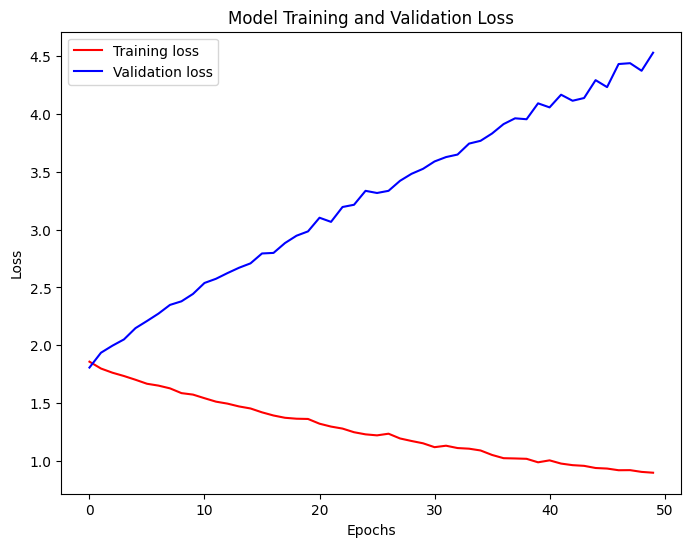

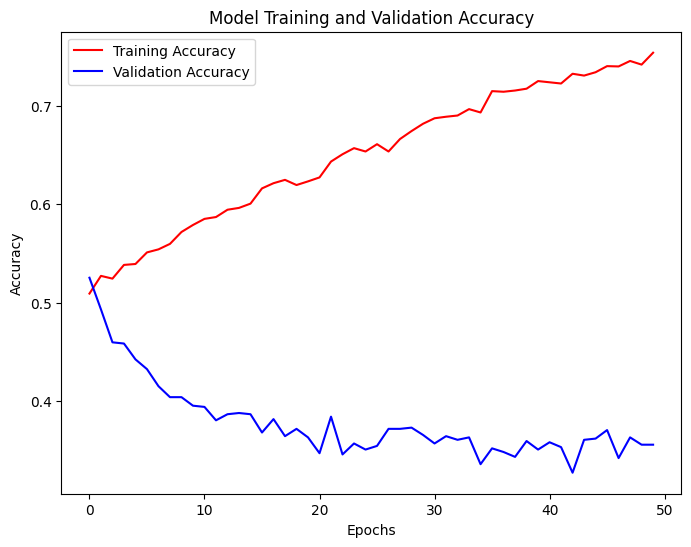

Diversity Score: 0.350


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

# Sample dataset
# Step 1: Load data
df = pd.read_excel('diploma.xlsx')  # Replace with your actual file path

# Step 2: Text preprocessing
# Combine all text data that the model should learn from
texts = df['tema'].tolist()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Including zero index
print('Vocabulary Size:', vocab_size)

# Create input-output pairs
sequence_length = 11  # Length of input sequences
inputs, outputs = [], []
for seq in sequences:
    for i in range(1, len(seq)):
        input_seq, output_seq = seq[:i], seq[i]
        input_seq = pad_sequences([input_seq], maxlen=sequence_length, padding='pre')[0]
        output_seq = to_categorical([output_seq], num_classes=vocab_size)[0]
        inputs.append(input_seq)
        outputs.append(output_seq)

inputs = np.array(inputs)
outputs = np.array(outputs)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=sequence_length))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(inputs, outputs, epochs=50, verbose=1)

# Function to generate text
def generate_text(seed_text, next_words, max_sequence_len, model, tokenizer):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generate text
new_text = generate_text("web", 11, sequence_length, model, tokenizer)
print(new_text)

#history = model.fit(X, Y, epochs=50, validation_split=0.2)
history = model.fit(inputs, outputs, epochs=50, validation_split=0.2)


if 'val_accuracy' in history.history:
    mean_val_accuracy = np.mean(history.history['val_accuracy'])
    print("Mean Validation Accuracy over all epochs:", mean_val_accuracy)

if 'val_loss' in history.history:
    mean_loss_accuracy = np.mean(history.history['val_loss'])
    print("Mean Validation Loss over all epochs:", mean_loss_accuracy)

# Function to plot the training and validation loss
def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], 'r', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # If accuracy is being tracked, plot that as well
    if 'accuracy' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
        plt.title('Model Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

# Call to plot function
plot_history(history)

from collections import Counter

def measure_diversity(texts):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    total_words = len(all_words)
    unique_words = len(word_counts)
    diversity_score = unique_words / total_words
    return diversity_score

# Example usage with a list of generated themes
#generated_themes = [generate_text("Deep learning", 5, model, sequence_length) for _ in range(10)]
diversity_score = measure_diversity(new_text)
print(f"Diversity Score: {diversity_score:.3f}")


Seq2Seq

In [ ]:
import pandas as pd
import numpy as np
import string
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_excel('diploma.xlsx')

# Define a clean text function that handles non-string data
def clean_text(data):
    if isinstance(data, str):
        data = "".join(v for v in data if v not in string.punctuation).lower()
        data = data.encode("utf8").decode("ascii", 'ignore')
    else:
        data = ""
    return data

sentence_start = "sentence_start"
sentence_end = "sentence_end"

# Apply text processing to the 'Theme' and 'Field' columns
df['cleaned_theme'] = df['theme'].apply(clean_text)
df['cleaned_field'] = df['field'].apply(clean_text)

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_theme'].tolist() + df['cleaned_field'].tolist())
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
df['theme_seq'] = tokenizer.texts_to_sequences(df['cleaned_theme'])
df['field_seq'] = tokenizer.texts_to_sequences(df['cleaned_field'])

# Determine maximum sequence length
max_length_theme = max(df['theme_seq'].apply(len))
max_length_field = max(df['field_seq'].apply(len))
max_length = max(max_length_theme, max_length_field)
max_length = 11

# Pad sequences
df['theme_seq'] = list(pad_sequences(df['theme_seq'], maxlen=max_length, padding='post'))
df['field_seq'] = list(pad_sequences(df['field_seq'], maxlen=max_length, padding='post'))

# Prepare data for the model
encoder_input_data = np.array(df['field_seq'].tolist())
decoder_input_data = np.array(df['theme_seq'].tolist())
decoder_target_data = np.roll(decoder_input_data, -1, axis=1)
decoder_target_data = to_categorical(decoder_target_data, num_classes=vocab_size)

# Model architecture
embedding_size = 50

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(vocab_size, embedding_size)(encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(50, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(vocab_size, embedding_size)(decoder_inputs)
decoder_lstm = LSTM(50, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define and compile the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=32, epochs=50, validation_split=0.2)

# Define the encoder model for later use in inference
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup for inference
decoder_state_input_h = Input(shape=(50,))
decoder_state_input_c = Input(shape=(50,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

# Model to predict
def decode_sequence(input_text):
    # Tokenize the input text
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_seq = pad_sequences(input_seq, maxlen=max_length, padding='post')

    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1 with only the 'sentence_start'.
    target_seq = np.zeros((1, 1))
    # Optionally, set the first token as 'sentence_start' if using it
    # target_seq[0, 0] = tokenizer.word_index['sentence_start']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer.index_word.get(sampled_token_index, 'UNK')
        decoded_sentence += ' ' + sampled_word

        # Exit condition: either hit max length or find stop token.
        if (sampled_word == 'sentence_end' or len(decoded_sentence.split()) > max_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

# Example decoding
test_seq = 'web security network' # Simulating a field input
print(decode_sequence(test_seq))


Epoch 1/50
12/12 [==============================] - 5s 119ms/step - loss: 6.8836 - accuracy: 0.2474 - val_loss: 6.8004 - val_accuracy: 0.2717
Epoch 2/50
12/12 [==============================] - 0s 27ms/step - loss: 6.4403 - accuracy: 0.2880 - val_loss: 5.8487 - val_accuracy: 0.2717
Epoch 3/50
12/12 [==============================] - 0s 31ms/step - loss: 5.4045 - accuracy: 0.2880 - val_loss: 5.1211 - val_accuracy: 0.2717
Epoch 4/50
12/12 [==============================] - 0s 30ms/step - loss: 4.8205 - accuracy: 0.2880 - val_loss: 4.8358 - val_accuracy: 0.2717
Epoch 5/50
12/12 [==============================] - 0s 30ms/step - loss: 4.5844 - accuracy: 0.2880 - val_loss: 4.7571 - val_accuracy: 0.2717
Epoch 6/50
12/12 [==============================] - 0s 30ms/step - loss: 4.5015 - accuracy: 0.2880 - val_loss: 4.7460 - val_accuracy: 0.2717
Epoch 7/50
12/12 [==============================] - 0s 29ms/step - loss: 4.4678 - accuracy: 0.2880 - val_loss: 4.7570 - val_accuracy: 0.2717
Epoch 8/50
1

TRYING FOR seq2seq

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'diploma.xlsx'
df = pd.read_excel(file_path)

# Select the column with the themes
texts = df['tema'].values

# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Pad sequences
max_seq_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

# Split the data into training and validation sets
X_train, X_val = train_test_split(data, test_size=0.2, random_state=42)


Build the Model

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding

# Define the model
embedding_dim = 100
latent_dim = 256
vocab_size = len(word_index) + 1  # Plus 1 for padding

# Encoder
encoder_inputs = Input(shape=(None,))
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(x)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(x, initial_state=encoder_states)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn encoder_input_data & decoder_input_data into decoder_target_data
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the Model

Epoch 1/50
5/5 [==============================] - 14s 1s/step - loss: 6.9873 - accuracy: 0.5306 - val_loss: 3.9209 - val_accuracy: 0.7113
Epoch 2/50
5/5 [==============================] - 4s 819ms/step - loss: 2.8946 - accuracy: 0.6858 - val_loss: 2.1942 - val_accuracy: 0.7113
Epoch 3/50
5/5 [==============================] - 4s 836ms/step - loss: 2.3477 - accuracy: 0.6858 - val_loss: 2.0968 - val_accuracy: 0.7113
Epoch 4/50
5/5 [==============================] - 4s 801ms/step - loss: 2.2306 - accuracy: 0.6893 - val_loss: 1.9884 - val_accuracy: 0.7281
Epoch 5/50
5/5 [==============================] - 4s 825ms/step - loss: 2.1010 - accuracy: 0.7031 - val_loss: 1.9398 - val_accuracy: 0.7269
Epoch 6/50
5/5 [==============================] - 4s 757ms/step - loss: 2.1578 - accuracy: 0.6970 - val_loss: 1.9164 - val_accuracy: 0.7294
Epoch 7/50
5/5 [==============================] - 2s 418ms/step - loss: 2.0207 - accuracy: 0.7027 - val_loss: 1.9057 - val_accuracy: 0.7294
Epoch 8/50
5/5 [======

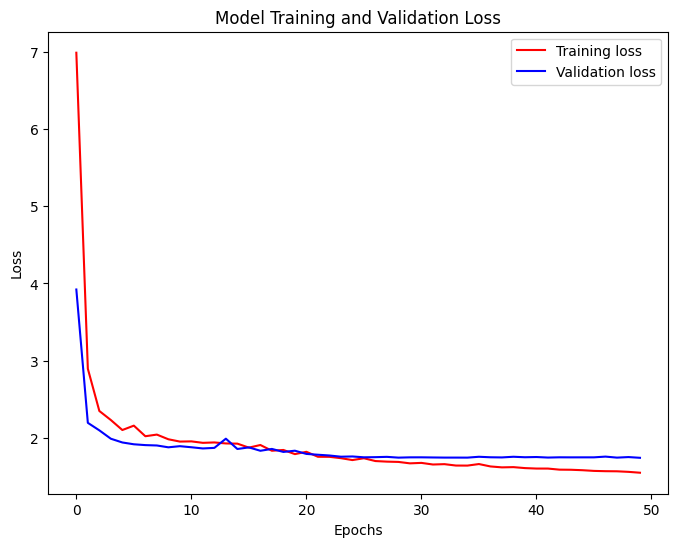

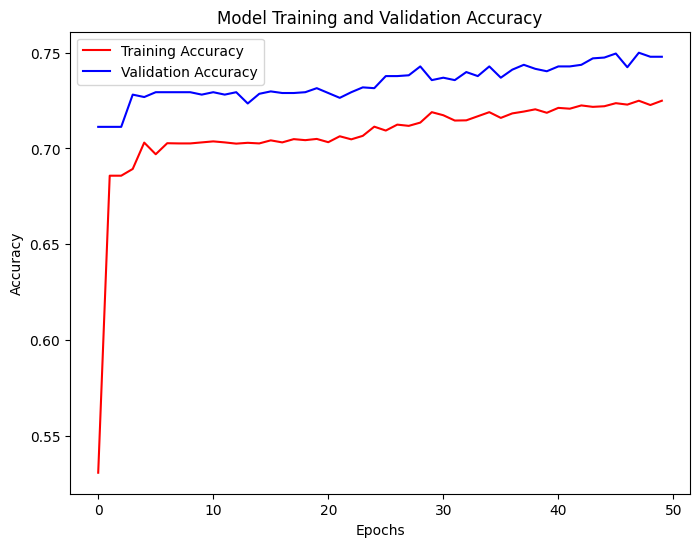

In [ ]:
import matplotlib.pyplot as plt
# Prepare the data for the decoder
decoder_input_data = np.zeros_like(X_train)
decoder_input_data[:, 1:] = X_train[:, :-1]

# Define targets
decoder_target_data = np.expand_dims(X_train, -1)

# Train the model
history = model.fit([X_train, decoder_input_data], decoder_target_data,
                    batch_size=64,
                    epochs=50,
                    validation_split=0.2)

#history = model.fit(inputs, outputs, epochs=50, validation_split=0.2)


if 'val_accuracy' in history.history:
    mean_val_accuracy = np.mean(history.history['val_accuracy'])
    print("Mean Validation Accuracy over all epochs:", mean_val_accuracy)

if 'val_loss' in history.history:
    mean_loss_accuracy = np.mean(history.history['val_loss'])
    print("Mean Validation Loss over all epochs:", mean_loss_accuracy)

# Function to plot the training and validation loss
def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], 'r', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # If accuracy is being tracked, plot that as well
    if 'accuracy' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
        plt.title('Model Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

# Call to plot function
plot_history(history)


Adjust Inference Models and Generate New Themes

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding
import numpy as np

latent_dim = 256  # Latent dimensionality of the encoding space
max_seq_length = 11  # Max sequence length to consider

# Define encoder model
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)
encoder_embedded = encoder_embedding(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedded)
encoder_states = [state_h, state_c]

encoder_model = Model(encoder_inputs, encoder_states)

# Define decoder model
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)
decoder_embedded = decoder_embedding(decoder_inputs)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_embedded, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1 with only the start character (index 0).
    target_seq = np.zeros((1, 1))

    # Sampling loop for a batch of sequences
    stop_condition = False
    i = 0;
    decoded_sentence = []
    while not stop_condition: #i <= 11: #
        # Prepare the decoder input to be passed to the decoder
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tokenizer.index_word.get(sampled_token_index, '')

        decoded_sentence.append(sampled_token)

        # Exit condition: either hit max length or find stop character (empty string).
        if sampled_token == '' or len(decoded_sentence) > max_seq_length:
            stop_condition = True
            #i = i+1

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return ' '.join(decoded_sentence)

# Test the generation
test_seq = np.array([X_val[3]])  # Using an actual sequence from the validation data
new_theme = decode_sequence(test_seq)
print(new_theme)

from collections import Counter

def measure_diversity(texts):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    total_words = len(all_words)
    unique_words = len(word_counts)
    diversity_score = unique_words / total_words
    return diversity_score

# Example usage with a list of generated themes
#generated_themes = [generate_text("Deep learning", 5, model, sequence_length) for _ in range(10)]
diversity_score = measure_diversity(new_theme)
print(f"Diversity Score: {diversity_score:.3f}")

1/1 [==============================] - 0s 42ms/step
upeve upeve tekst tekst shenjave qasjen shenjave relacionale relacionale cnn komunikim shenimeve
Diversity Score: 0.212
